## Diabetes Patient Analysis & Prediction with Python

**Description:** This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Objective:** The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset.

**Data Decription:** 
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration
* Blood Pressure: Diastolic blood pressure (mm Hg)
* Skin Thickness: Skinfold thickness (mm)
* Insulin: Amount of insulin in the blood (uIU/ml)
* BMI: Body Mass Index (kg/m^2)
* Diabetes Pedigree Function
* Age: Age in years
* Outcome: Diabetic or not diabetic (1-True, 0-False)

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/apple/Downloads/Projects/Project 2 - Diabetes Data/diabetes.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
# Check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### From the above information, there are no missing or null values and our data types are in the correct format. There are 9 columns and 768 rows

In [4]:
# Summarize the data
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

**Observation:**

Glucose, Blood Pressure, Skin Thinkiness, Insulin, BMI have zero has their minimumm value. It is not ideal for these columns to have zero values, it means measuremnt of those column rows were null and it was replaced with zero values.

In [5]:
glucose = data[data["Glucose"]==0].shape[0]
bp = data[data["BloodPressure"]==0].shape[0]
st = data[data["SkinThickness"]==0].shape[0]
insulin = data[data["Insulin"]==0].shape[0]
bmi = data[data["BMI"]==0].shape[0]

print(f"Theese columns below have the following number of zeros:\nGlucose: {glucose}\nBlood Pressure: {bp}\nSkin Thickness: {st}\nInsulin: {insulin}\nBMI: {bmi}")

Theese columns below have the following number of zeros:
Glucose: 5
Blood Pressure: 35
Skin Thickness: 227
Insulin: 374
BMI: 11


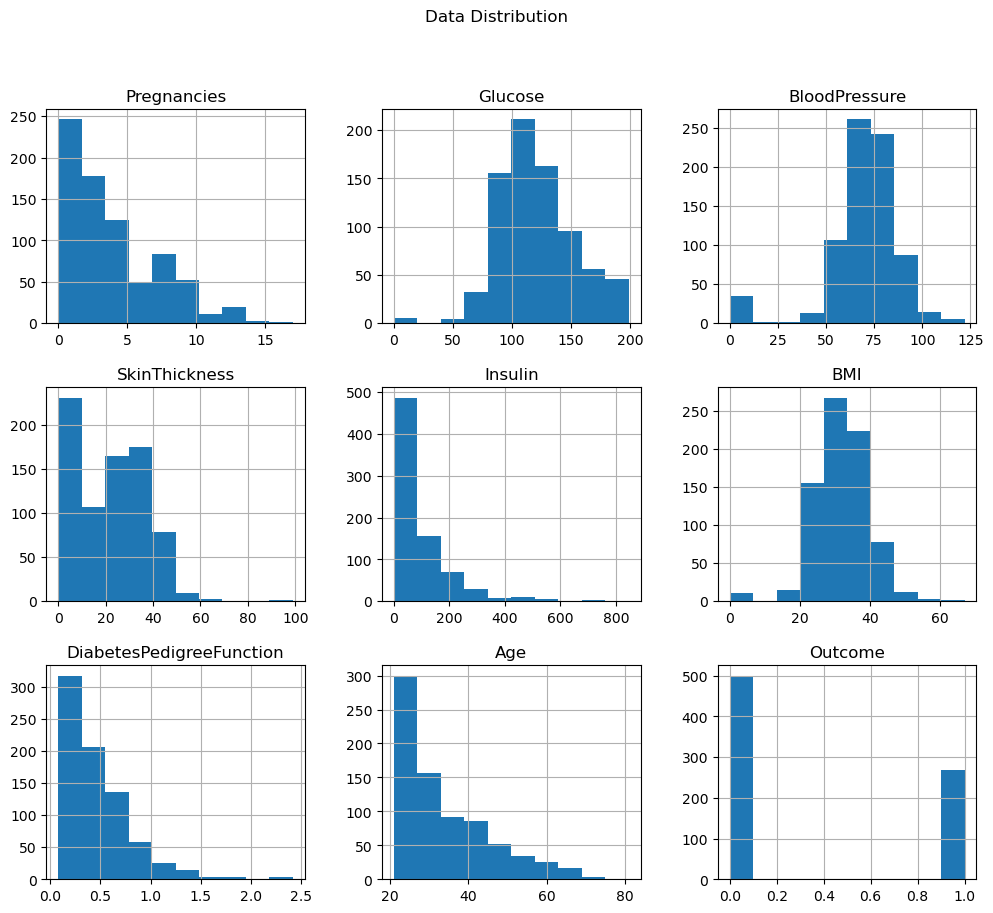

In [6]:
data.hist(figsize=(12,10))
plt.suptitle("Data Distribution")
plt.show()

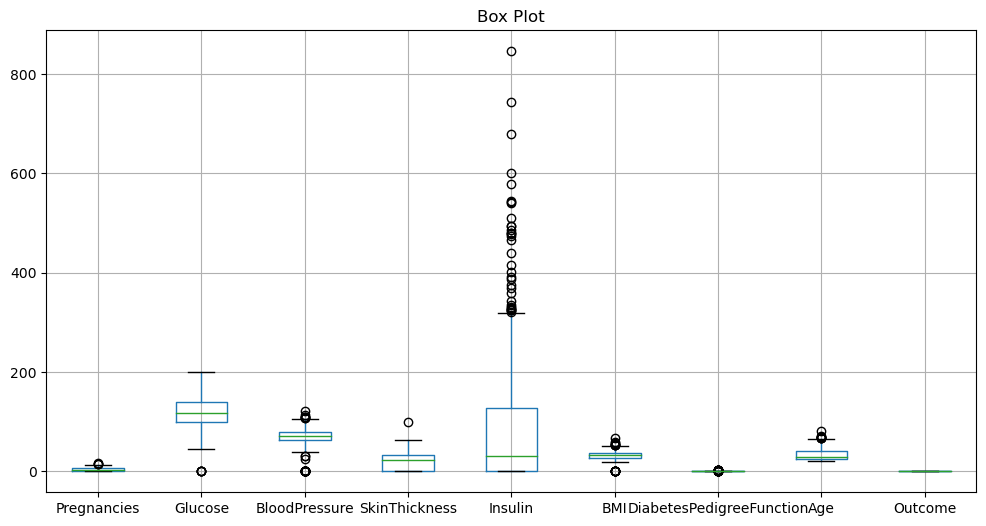

In [7]:
data.boxplot(figsize=(12,6))
plt.title("Box Plot")
plt.show()

From the above plots, it is observed that most the data columns skewed to the right and left and it has a lot of outliers. For this reason, I will replace the zero values with the median of each column value

In [8]:
# Replace the zero values in these columns with their respective column medians

data["Glucose"] = data["Glucose"].replace(0,data["Glucose"].median())
data["BloodPressure"] = data["BloodPressure"].replace(0,data["BloodPressure"].median())
data["SkinThickness"] = data["SkinThickness"].replace(0,data["SkinThickness"].median())
data["Insulin"] = data["Insulin"].replace(0,data["Insulin"].median())
data["BMI"] = data["BMI"].replace(0,data["BMI"].median())

In [9]:
# Confirm to see it there are still zero values
glucose = data[data["Glucose"]==0].shape[0]
bp = data[data["BloodPressure"]==0].shape[0]
st = data[data["SkinThickness"]==0].shape[0]
insulin = data[data["Insulin"]==0].shape[0]
bmi = data[data["BMI"]==0].shape[0]

print(f"Theese columns below have the following number of zeros:\nGlucose: {glucose}\nBlood Pressure: {bp}\nSkin Thickness: {st}\nInsulin: {insulin}\nBMI: {bmi}")

Theese columns below have the following number of zeros:
Glucose: 0
Blood Pressure: 0
Skin Thickness: 0
Insulin: 0
BMI: 0


In [10]:
# Check for dulicate rows

data.duplicated().sum()

0

There a re no duplicate rows

In [11]:
# Summarize the data again
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      27.334635   94.652344   
std       3.369578   30.438286      12.096642       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [12]:
# FInd out the number of unique values in the outcome column
data["Outcome"].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

**Observation:**

There are 500 non-diabetic and 268 that are diabetic (i.e. 0 -> False, 1-> True)

<Axes: xlabel='Outcome'>

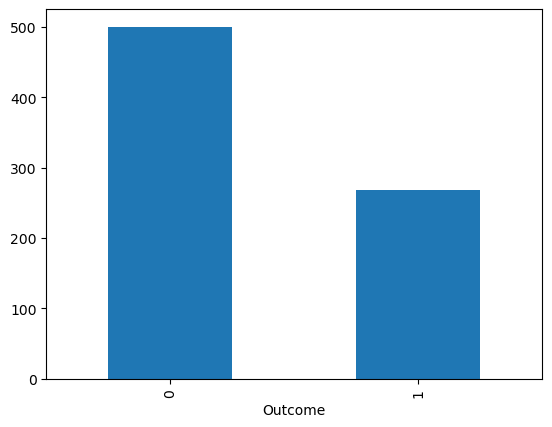

In [13]:
# Visualize the outcome
data["Outcome"].value_counts().plot(kind="bar")


In [14]:
# Creating a correlation matrix
correlation_matrix = data.corr()
correlation_matrix

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.032568   
Glucose                      0.128213  1.000000       0.218937       0.172143   
BloodPressure                0.208615  0.218937       1.000000       0.147809   
SkinThickness                0.032568  0.172143       0.147809       1.000000   
Insulin                     -0.055697  0.357573      -0.028721       0.238188   
BMI                          0.021546  0.231400       0.281132       0.546951   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.142977   
Age                          0.544341  0.266909       0.324915       0.054514   
Outcome                      0.221898  0.492782       0.165723       0.189065   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.055697  0.021546                 -0.033523   
Glucose                   0.357573  0.231400                  0.137327   
BloodPressure            -0.028721  0.281132                 -0.002378   
SkinThickness             0.238188  0.546951                  0.142977   
Insulin                   1.000000  0.189022                  0.178029   
BMI                       0.189022  1.000000                  0.153506   
DiabetesPedigreeFunction  0.178029  0.153506                  1.000000   
Age                      -0.015413  0.025744                  0.033561   
Outcome                   0.148457  0.312249                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266909  0.492782  
BloodPressure             0.324915  0.165723  
SkinThickness             0.054514  0.189065  
Insulin                  -0.015413  0.148457  
BMI                       0.025744  0.312249  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<Axes: >

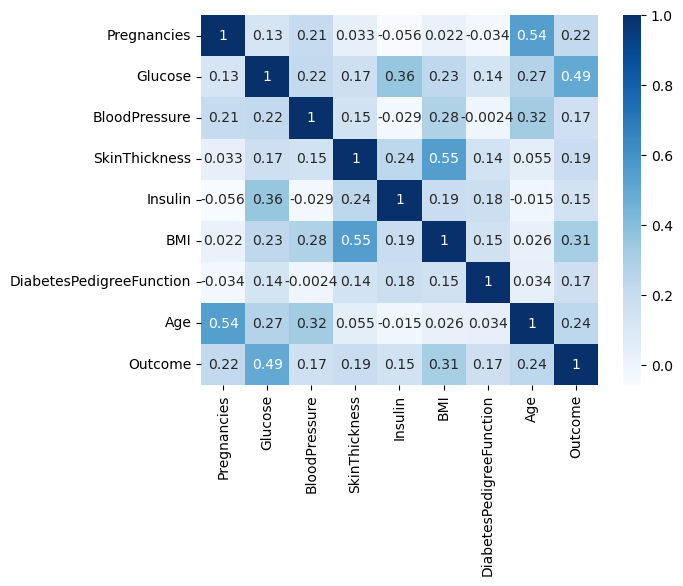

In [15]:
# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="Blues")

**Observation:**

* Glucose has compared to the others have a positive correlation with the outcome.
* Age is positively correlated to pregnancies
* BMI and Skin thickness have a positive correlation

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


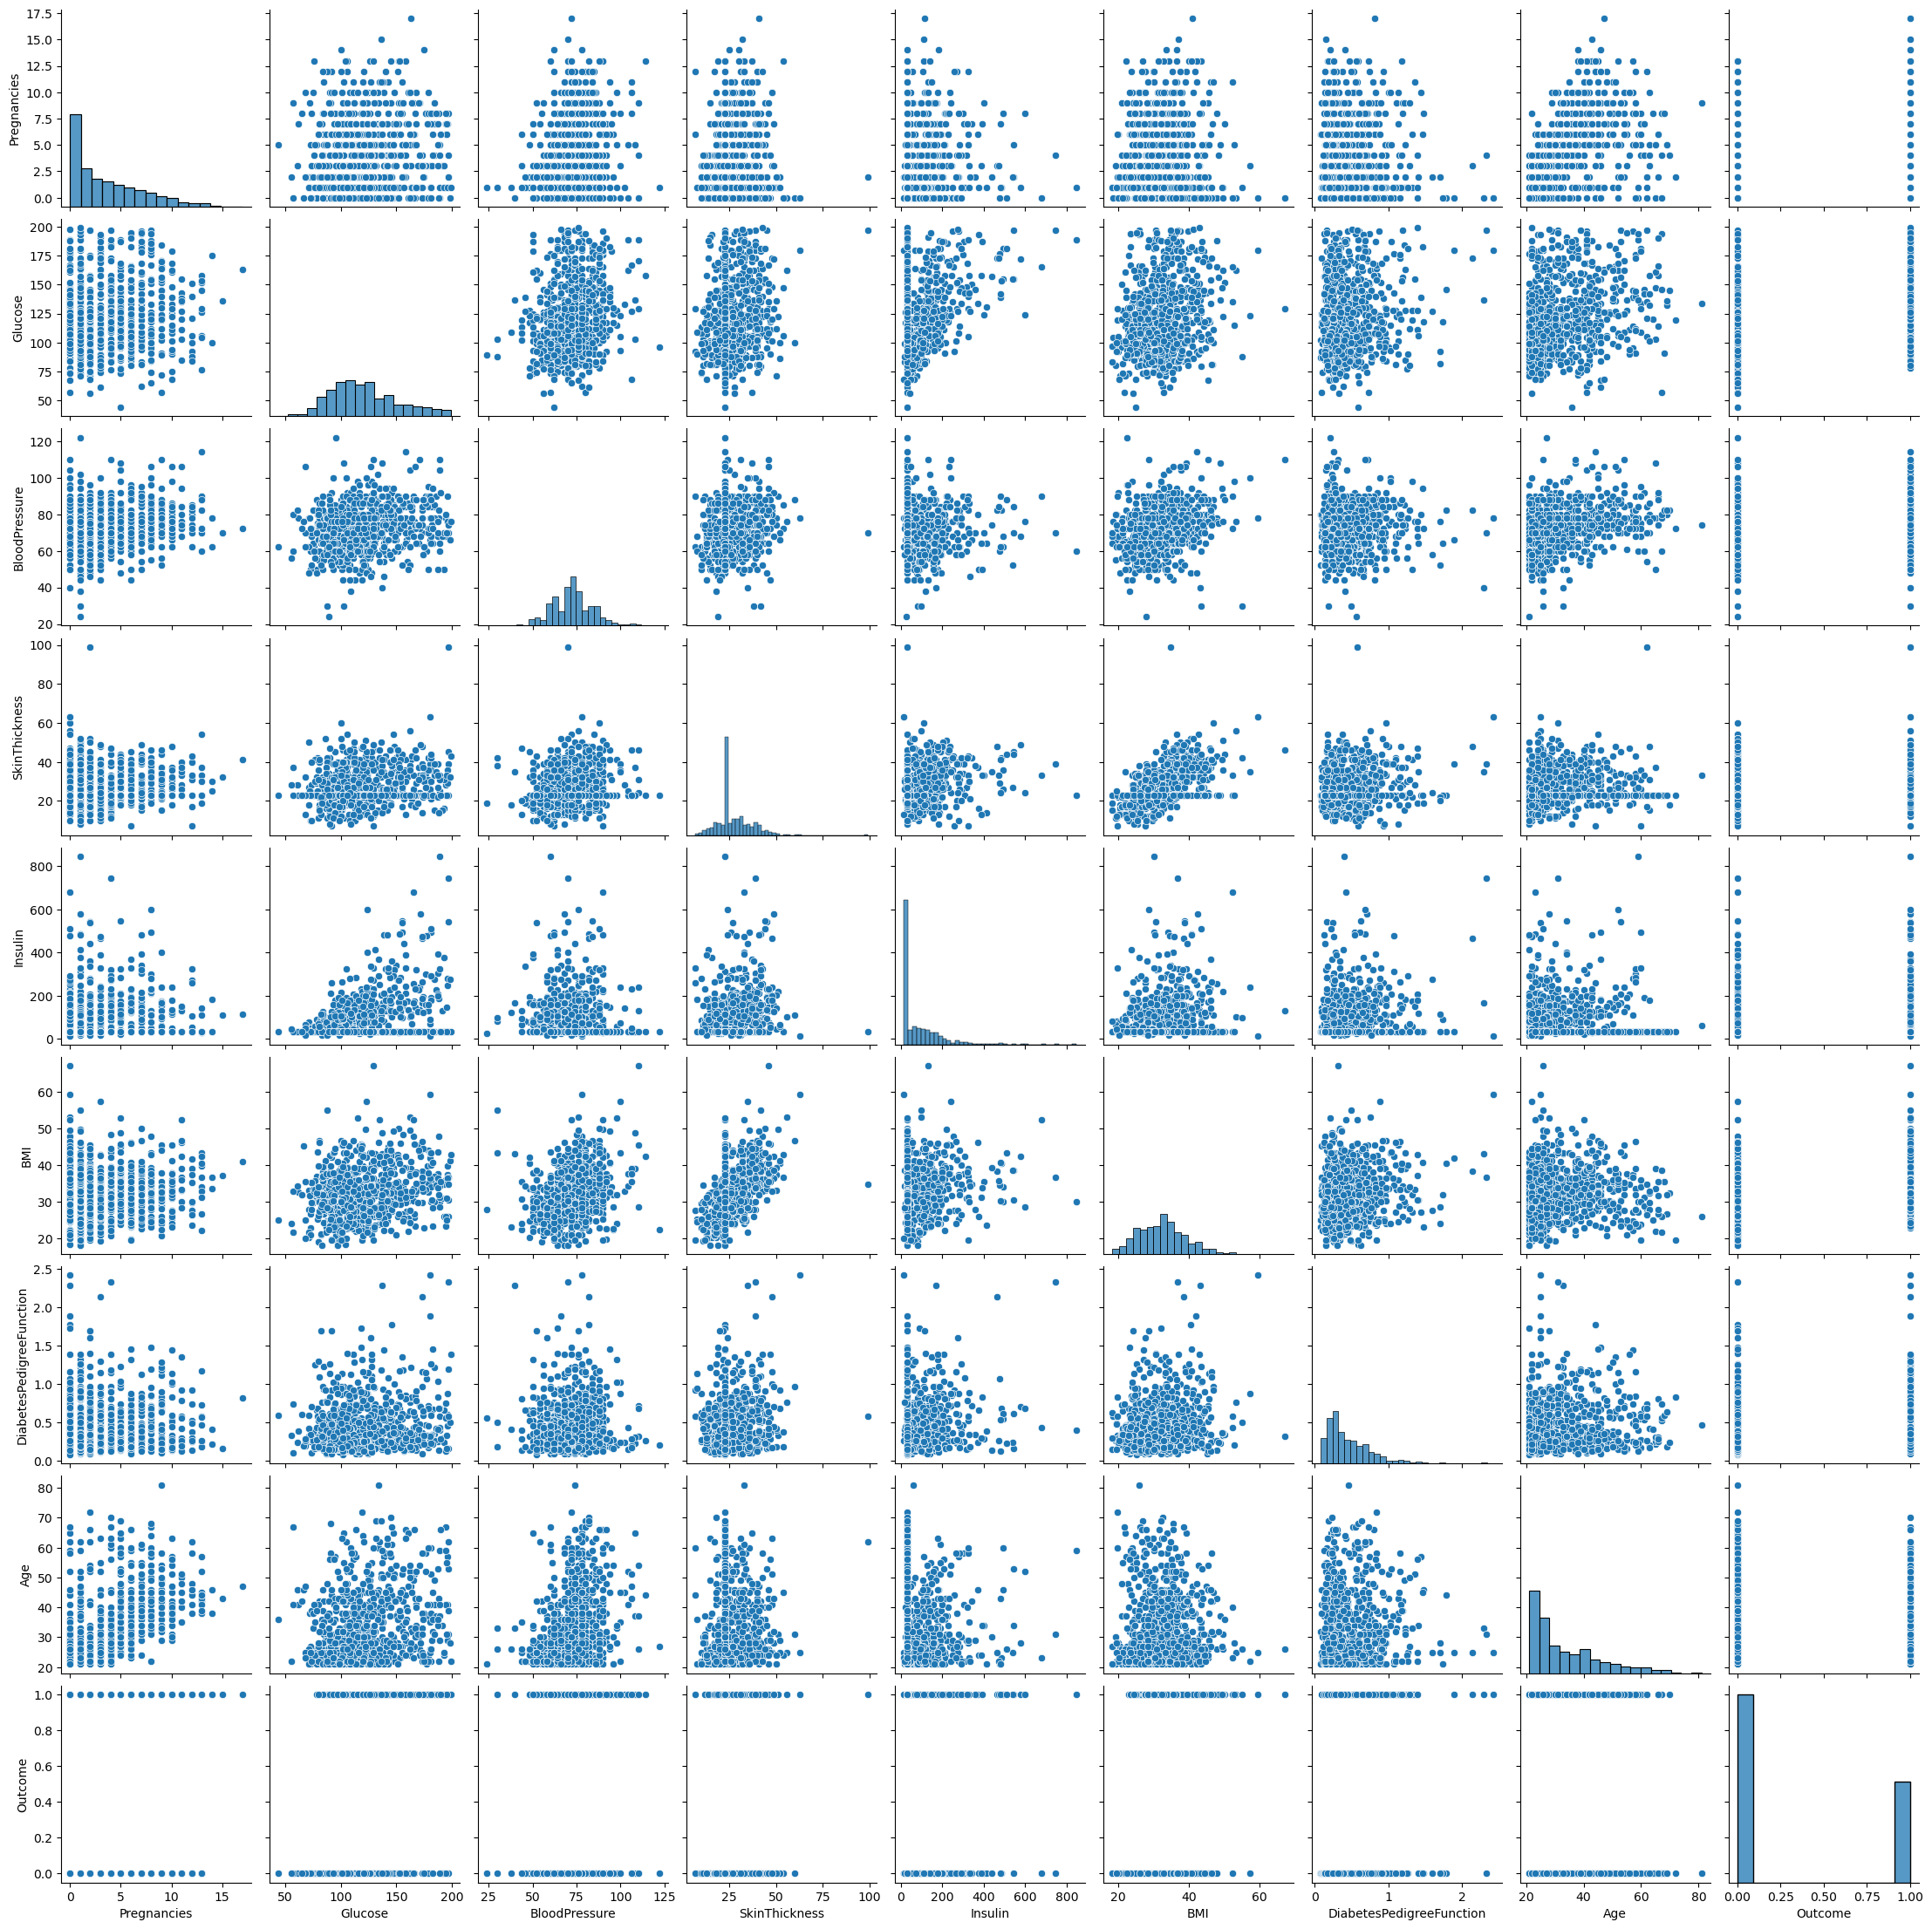

In [16]:
# Plot a pairplot to further investigate the correlation between variables.
sns.pairplot(data)

In [17]:
# Create X and y variables
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (768, 8)
Shape of y: (768,)


In [18]:
# View the first 5 rows of X and y

X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [19]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [20]:
# Standardize the units because the features in the dataset have different scales.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_standardized = scaler.fit_transform(X)

In [21]:
X_standardized

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]])

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standardized, 
                                                    y, 
                                                   stratify=y,
                                                   test_size=0.3,
                                                   random_state=42)

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
len(X_train), len(X_test), len(y_train), len(y_test)

(537, 231, 537, 231)

In [23]:
# Import models for binary classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initilize the models
models = {"Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(n_estimators=200),
        "Support Vector Machine": SVC(kernel="linear")}


# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    y_preds = model.predict(X_test)
    
    print(f"Model: {model_name}")
    print("Training Accuracy")
    print(accuracy_score(y_train, y_pred))
    print("Testing Accuracy")
    print(accuracy_score(y_test, y_preds))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_preds))
    print("Classification Report")
    print(classification_report(y_test, y_preds))

Model: Logistic Regression
Training Accuracy
0.7932960893854749
Testing Accuracy
0.7532467532467533
Confusion Matrix
[[130  20]
 [ 37  44]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.69      0.54      0.61        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.75       231

Model: Decision Tree
Training Accuracy
1.0
Testing Accuracy
0.6796536796536796
Confusion Matrix
[[119  31]
 [ 43  38]]
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       150
           1       0.55      0.47      0.51        81

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.63       231
weighted avg       0.67      0.68      0.67       231

Model: Random Forest
Training Accuracy
1.0


**Observation:**

* Logistic Regression & Random Forest models have a better **_Precision_**, **_Recall_**, **_F1 Score_** & **_Weighted Avg_** as compared with the others

* Random Forest and Decision Trees are overfitted with training data.

### Model Improvement

* **Random Forest**

In [24]:
# Evaluate Random Forest

from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE 


# Implement SMOTE for oversampling
oversample = SMOTE()

# Prepare X_train and y_train for our overfitted model
X_train_over = X_train
y_train_over = y_train

X_train_over, y_train_over = oversample.fit_resample(X_train_over, y_train_over)

# Initialize and train a Random Forest Classifier with GridSearchCV
param_grid = {"n_estimators": [100, 200, 300],
             "max_depth": [10, 20, 30, None]}

rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train_over, y_train_over)
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_train_over)

# Evaluate the model
y_preds = best_rf_model.predict(X_test)
print("Training Accuracy")
print(accuracy_score(y_train_over, y_pred))
print("Testing Accuracy")
print(accuracy_score(y_test, y_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_preds))
print("Classification Report:")
print(classification_report(y_test, y_preds))

Training Accuracy
1.0
Testing Accuracy
0.7402597402597403
Confusion Matrix:
[[118  32]
 [ 28  53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       150
           1       0.62      0.65      0.64        81

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



* **Decision Tree**

In [25]:
# Initialize and train a Decision Tree model with hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train_over, y_train_over)
best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_train_over)

# Make predictions
y_preds = best_dt_model.predict(X_test)

# Print classification report and confusion matrix
print("Training Accuracy")
print(accuracy_score(y_train_over, y_pred))
print("Testing Accuracy")
print(accuracy_score(y_test, y_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_preds))
print("Classification Report:")
print(classification_report(y_test, y_preds))
print(best_dt_model)

Training Accuracy
0.85
Testing Accuracy
0.7445887445887446
Confusion Matrix:
[[113  37]
 [ 22  59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       150
           1       0.61      0.73      0.67        81

    accuracy                           0.74       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.74      0.75       231

DecisionTreeClassifier(max_depth=5)


# Logistic Regression and SVM are the best models because it has better training and test accuracy. Also Logistic Regression standout of them all because it has a better Recall, Precision and F1-Score